Data Mining: Basic Concepts - WS'19/20 
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Dr. Johannes Fuchs, Eren Cakmak, Frederik Dennig
```
__Organize in teams of 2 people, return the exercise by Tue, Nov 26, 2019 (10:00 AM) using ILIAS (_only one Jupyter Notebook .ipyb file_)__

---

Assignment 04 in R - _(20 Points)_
---------------
- ___Please put your names and student IDs here___:
    - _Name_, _Student ID_
    - _Name_, _Student ID_

---

#### Exercise 1: Naïve Bayes Classification - _(8 Points)_

|MsgID|TimeZone|GeoLocation|SuspiciousSubject|SuspiciousBody|Spam|
|-----|--------|-----------|-----------------|--------------|----|
|1|US|US|No|Yes|No|
|2|US|US|No|No|No|
|3|EU|US|No|Yes|Yes|
|4|AS|EU|No|Yes|Yes|
|5|AS|AS|Yes|Yes|Yes|
|6|AS|AS|Yes|No|No|
|7|EU|AS|Yes|No|Yes|
|8|US|EU|No|Yes|No|
|9|US|AS|Yes|Yes|Yes|
|10|AS|EU|Yes|Yes|Yes|
|11|US|EU|Yes|No|Yes|
|12|EU|EU|No|No|Yes|
|13|EU|US|Yes|Yes|Yes|
|14|AS|EU|No|No|No|

* EU = Europe; US = United States; AS = Asia

##### __(a) According to the lecture slides, a Naïve Bayes Classifier assumes class conditional independence. Explain what this means and why that might be a problem__

This means that the atributes are not related to each other. This is a problem, because most problems are not caused by a single atribute, but by a multitude of interconnected factors.

##### __(b) Calculate all conditional probabilities of a  Naïve Bayes Classifier with the given data by hand.__

##### __(c)	Calculate the posterior probabilities and classify the following three E-Mails by means of the trained classifier:__
    a. E-mail A = (US, US, Yes, Yes)
    b. E-mail B = (Asia, Asia, No, No)
    c. E-mail C = (EU, Asia, No, Yes)


##### __(d) The output of a naïve bayes classifier includes the assigned class as well as the probability that the assignment is correct. Give one reason why this could be an advantage over classifiers that only return the assigned class but no probability.__

---

#### Exercise 2: Pruning Decision Trees  - _(8 Points)_

__We will investigate the “diabetes.csv” dataset. Read the “description.txt” to understand the individual columns. Use the already imported libraries for this exercise.__

In [2]:
# Run here. In case of problems accessing the library functionalities, also try running the commands in the R console.
if (!require('caTools')) {
    install.packages('caTools')
    library('caTools')
}
if (!require('rpart')) {
    install.packages('rpart')
    library('rpart')
}
if (!require('rpart.plot')) {
    install.packages('rpart.plot')
    library('rpart.plot')
}

Loading required package: caTools
Loading required package: rpart
Loading required package: rpart.plot


##### __(a) Load the dataset and use a sampling method to split the dataset into a training (80% rows) and test (20% rows) dataset. The target column is the last column.__
_(Hint: use the `sample.split` from the `caTools` library and use the output to create subsets with the `subset` function)_

In [3]:
data = read.csv('diabetes.csv')
names(data) <- c('pregnant', 'plasma', 'pressure', 'thiccness', 'insulin', 'bmi', 'pedigree', 'age', 'class')

use = sample.split(t(data), 0.8)

train = na.omit(data[use == TRUE, ])
test = na.omit(data[use == FALSE, ])

ncol(t(train))/ncol(t(test))

[1] 4.326389

##### __(b) Use the training dataset to train a decision tree. Set following parameters for the `rpart` function: `minsplit=1` and `cp=0`.  Plot the tree.__
_(Hint: use `rpart` and `rpart.plot`. Warnings about overplotting are fine.)_

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"

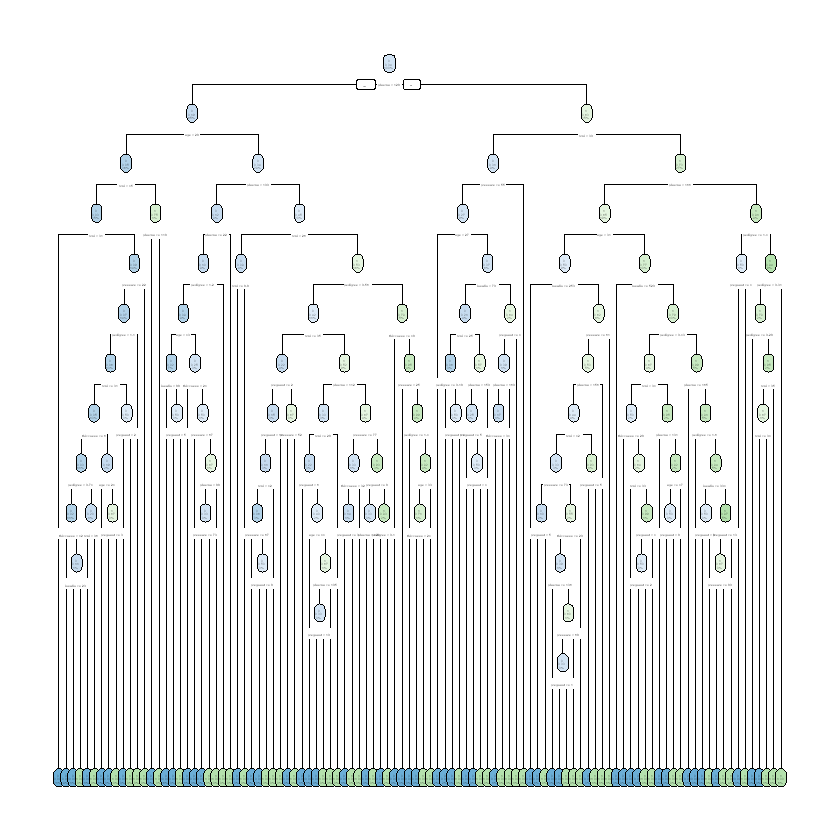

In [4]:
model = rpart(class ~ pregnant + plasma + pressure + thiccness + insulin + bmi + pedigree + age, train, minsplit=1, cp=0, method="class")
rpart.plot(model)

##### __(c)	Measure the accuracy of the decision tree on the training and test dataset. The accuracy is one metric for evaluating classification models. `Accuracy = (number of correct predictions) / (total number of predictions)`.__ 

In [14]:
pred = rpart.predict(model, test, type = "class")
res = pred == test$class

accuracy = length(res[res == TRUE])/nrow(test)*100
print(paste(accuracy, '% correct'))

[1] "68.75 % correct"


##### __(d) Use prepruning and train a new decision tree. Use the `maxdepth=7` parameter for `rpart` and do not add those from (b). Plot the pruned decision tree.__

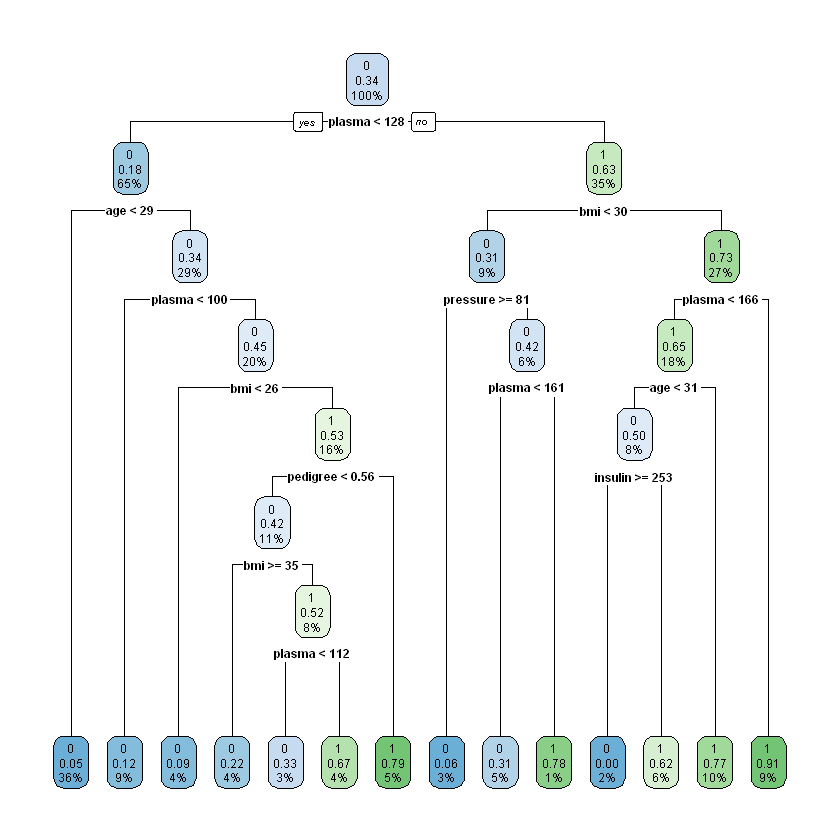

In [6]:
model2 = rpart(class ~ pregnant + plasma + pressure + thiccness + insulin + bmi + pedigree + age,  train, method="class", maxdepth=7)
rpart.plot(model2)

##### __(e) Measure the accuracy of the pruned decision tree on the training and test dataset.__

In [13]:
pred = rpart.predict(model2, test, type = "class")
res = pred == test$class

accuracy = length(res[res == TRUE])/nrow(test)*100
print(paste(accuracy, '% correct'))

[1] "85.2327447833066 % correct"


##### __(f) Explain and discuss the results from c) and e).__

The pruned tree is less overfit, since it is forced to model the data with less complexity than the tree before. Therfore can only manage to be 85% correct on the original training data compared to 100% of the unpruned tree. However, this results in a better prediction for data that was not in the training set. That explains why the results are better even though there are less nodes. 

---

#### Exercise 3: Naïve Bayes Classification - _(4 Points)_

__In this exercise we will use the Naïve Bayes classification methods on a real data set. We will classify the digits dataset (see https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)__

In [96]:
if (!require('pheatmap')) {
    install.packages('pheatmap')
    library('pheatmap')
}
if (!require('e1071')) {
    install.packages('e1071')
    library('e1071')
}

In [97]:
digits <- read.csv('digits.csv', header=FALSE)
print(head(digits))

  V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21
1  0  1  6 15 12  1  0  0  0   7  16   6   6  10   0   0   0   8  16   2   0
2  0  0 10 16  6  0  0  0  0   7  16   8  16   5   0   0   0  11  16   0   6
3  0  0  8 15 16 13  0  0  0   1  11   9  11  16   1   0   0   0   0   0   7
4  0  0  0  3 11 16  0  0  0   0   5  16  11  13   7   0   0   3  15   8   1
5  0  0  5 14  4  0  0  0  0   0  13   8   0   0   0   0   0   3  14   4   0
6  0  0 11 16 10  1  0  0  0   4  16  10  15   8   0   0   0   4  16   3  11
  V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40
1  11   2   0   0   5  16   3   0   5   7   0   0   7  13   3   0   8   7   0
2  14   3   0   0  12  12   0   0  11  11   0   0  12  12   0   0   8  12   0
3  14   0   0   0   0   3   4  14  12   2   0   0   1  16  16  16  16  10   0
4  15   6   0   0  11  16  16  16  16  10   0   0   1   4   4  13  10   2   0
5   0   0   0   0   6  16  14   9   2   0   0   0   4  16   3   4  11  

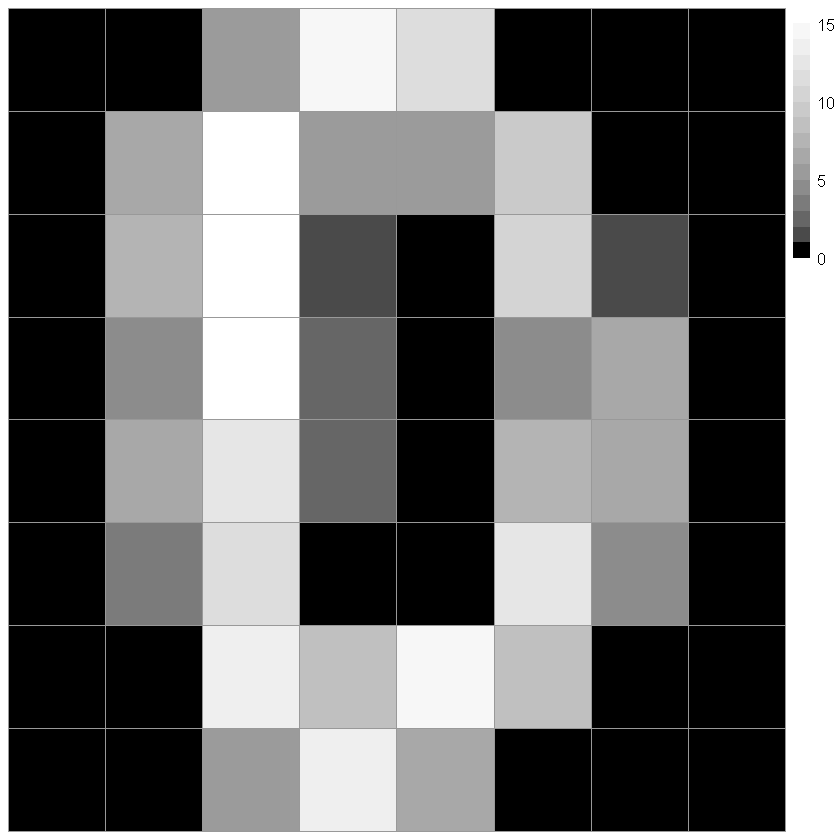

In [98]:
m <- matrix(as.numeric(digits[1,1:64]), nrow=8, ncol=8, byrow=TRUE)
pheatmap(m, cluster_row = FALSE, cluster_col = FALSE, color=gray.colors(16,start=0,end=1))

##### __(a) Split the dataset into a training (80% rows) and test (20% rows) data. The last column contains the label.__
_(Hint: use the `sample.split` from the `caTools` library and use the output to create subsets with the `subset` function)_

##### __(b) Generate a model and fit the dataset on the classifier.__ 
_(Hint: use already implemented version in `naiveBayes` form the `e1071` library)_

##### __(c) Compute the accuracy on the train and test data using the trained model.__ 
_(Hint: use the `predict` function)_